## Analyze trials


- position plots look much nicer when using mult

In [377]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
from concise.hyopt import CompileFN, CMongoTrials, test_fn
import numpy as np
import pandas as ps
from concise.utils.splines import BSpline
from keras.models import load_model
import sklearn.metrics as skm
import concise.eval_metrics as cem
import keras.callbacks as kc
import data
import model
from helper import *

DB_NAME = "Concise__Splice_branchpoints"
exp_name = "model_shallow"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
trials = CMongoTrials(DB_NAME, exp_name, kill_timeout=30 * 60)

In [126]:
df = trials.as_df().sort_values("eval.auprc", ascending=False)
df

,tid,loss,status,eval.accuracy,eval.auc,eval.auprc,eval.f1,eval.fdr,eval.loss,eval.precision,eval.sensitivity,eval.specificity,name.data,name.loss_metric,name.loss_metric_mode,name.model,param.data.n_bases,param.data.pos_class_weight,param.data.truncate,param.fit.batch_size,param.fit.early_stop_monitor,param.fit.epochs,param.fit.patience,param.model.filters,param.model.init_motifs,param.model.init_motifs.n_pwm,param.model.init_motifs.stddev,param.model.init_motifs.use_pssm,param.model.lr,param.model.nonlinearity,param.model.pos_effect.l2,param.model.pos_effect.l2_smooth,param.model.pos_effect.merge.hidden_fc,param.model.pos_effect.merge.type,param.model.pos_effect.n_bases,param.model.pos_effect.use_bias,path.model,path.results,time.duration.dataload,time.duration.total,time.duration.training,time.end,time.start
167,2442,-0.6222,ok,0.9590,0.9260,0.6222,0.5519,0.2544,0.1214,0.7456,0.4431,0.9907,data,auprc,auprc,model,30,2.0,True,128,val_loss,150,2,2,NaN,NaN,NaN,NaN,0.0037,relu,1.7293e-08,3.3479e-06,NaN,add,30,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,54.7903,105.2413,50.4510,2017-05-01 21:12:19.3...,2017-05-01 21:10:34.1...
148,2423,-0.6222,ok,0.9590,0.9262,0.6222,0.5446,0.2441,0.1213,0.7559,0.4304,0.9915,data,auprc,auprc,model,30,2.0,True,128,val_loss,150,2,2,NaN,NaN,NaN,NaN,0.0014,relu,2.3249e-08,5.4834e-13,NaN,add,30,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,94.5787,239.0422,144.4635,2017-05-01 21:10:22.0...,2017-05-01 21:06:22.9...
156,2431,-0.6222,ok,0.9590,0.9259,0.6222,0.5473,0.2491,0.1214,0.7509,0.4356,0.9911,data,auprc,auprc,model,30,2.0,True,128,val_loss,150,2,2,NaN,NaN,NaN,NaN,0.0028,relu,5.0579e-06,1.2802e-05,NaN,add,30,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,93.7191,179.3327,85.6136,2017-05-01 21:10:52.1...,2017-05-01 21:07:52.7...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,2296,-0.1680,ok,0.9425,0.7866,0.1680,NaN,NaN,0.1896,NaN,0.0001,1.0000,data,auprc,auprc,model,20,2.0,True,128,val_loss,150,2,1,NaN,NaN,NaN,NaN,0.0002,relu,2.2691e-08,6.0731e-12,NaN,add,20,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,47.6512,385.3968,337.7456,2017-05-01 20:46:48.1...,2017-05-01 20:40:22.7...
185,2460,-0.1545,ok,0.9425,0.7787,0.1545,NaN,NaN,0.1946,NaN,0.0000,1.0000,data,auprc,auprc,model,30,2.0,True,128,val_loss,150,2,1,NaN,NaN,NaN,NaN,0.0036,relu,1.1692e-08,6.6845e-01,NaN,add,30,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,55.0815,206.9382,151.8567,2017-05-01 21:16:03.8...,2017-05-01 21:12:36.8...
36,2311,-0.1493,ok,0.9425,0.7764,0.1493,NaN,NaN,0.1924,NaN,0.0004,1.0000,data,auprc,auprc,model,10,2.0,True,128,val_loss,150,2,1,NaN,NaN,NaN,NaN,0.0020,relu,2.3493e-12,4.8557e-12,NaN,concatenate,10,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,39.4273,165.7666,126.3393,2017-05-01 20:46:02.0...,2017-05-01 20:43:16.3...


In [238]:
df[~df["param.model.init_motifs.use_pssm"].isnull()]

,tid,loss,status,eval.accuracy,eval.auc,eval.auprc,eval.f1,eval.fdr,eval.loss,eval.precision,eval.sensitivity,eval.specificity,name.data,name.loss_metric,name.loss_metric_mode,name.model,param.data.n_bases,param.data.pos_class_weight,param.data.truncate,param.fit.batch_size,param.fit.early_stop_monitor,param.fit.epochs,param.fit.patience,param.model.filters,param.model.init_motifs,param.model.init_motifs.n_pwm,param.model.init_motifs.stddev,param.model.init_motifs.use_pssm,param.model.lr,param.model.nonlinearity,param.model.pos_effect.l2,param.model.pos_effect.l2_smooth,param.model.pos_effect.merge.hidden_fc,param.model.pos_effect.merge.type,param.model.pos_effect.n_bases,param.model.pos_effect.use_bias,path.model,path.results,time.duration.dataload,time.duration.total,time.duration.training,time.end,time.start
130,2405,-0.6213,ok,0.9590,0.9259,0.6213,0.5410,0.2394,0.1223,0.7606,0.4244,0.9918,data,auprc,auprc,model,30,2.0,True,128,val_loss,150,2,2,NaN,1.0,0.0032,False,0.0009,relu,1.4770e-04,6.7660e-12,NaN,concatenate,30,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,90.9185,473.5274,382.6089,2017-05-01 21:10:03.0...,2017-05-01 21:02:09.5...
95,2370,-0.6211,ok,0.9589,0.9255,0.6211,0.5358,0.2328,0.1227,0.7672,0.4166,0.9922,data,auprc,auprc,model,30,2.0,True,128,val_loss,150,2,2,NaN,1.0,0.0347,False,0.0013,relu,3.7143e-04,3.3350e-14,NaN,concatenate,30,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,84.6263,433.2529,348.6266,2017-05-01 21:00:59.7...,2017-05-01 20:53:46.4...
72,2347,-0.6195,ok,0.9586,0.9259,0.6195,0.5375,0.2445,0.1217,0.7555,0.4223,0.9916,data,auprc,auprc,model,20,2.0,True,128,val_loss,150,2,2,NaN,1.0,0.0005,True,0.0008,relu,1.1806e-15,8.9236e-13,NaN,concatenate,20,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,48.1073,287.3309,239.2237,2017-05-01 20:54:41.2...,2017-05-01 20:49:53.8...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2252,-0.4653,ok,0.9502,0.8861,0.4653,0.3707,0.3229,0.1474,0.6771,0.2585,0.9925,data,auprc,auprc,model,10,2.0,True,128,val_loss,150,2,2,NaN,1.0,0.0499,False,0.0003,relu,8.5735e+00,5.9387e-01,NaN,multiply,10,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,38.5899,301.3444,262.7545,2017-05-01 20:43:11.0...,2017-05-01 20:38:09.6...
41,2316,-0.4334,ok,0.9469,0.8619,0.4334,0.2228,0.2972,0.1553,0.7028,0.1346,0.9966,data,auprc,auprc,model,30,2.0,True,128,val_loss,150,2,2,NaN,2.0,0.0155,True,0.0011,relu,9.2151e-07,9.1085e+01,NaN,add,30,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,107.9648,233.1451,125.1803,2017-05-01 20:48:29.5...,2017-05-01 20:44:36.3...
56,2331,-0.4321,ok,0.9471,0.8644,0.4321,0.2352,0.3033,0.1553,0.6967,0.1437,0.9962,data,auprc,auprc,model,20,2.0,True,128,val_loss,150,2,2,NaN,1.0,0.0277,True,0.0048,relu,1.2986e+00,9.0389e-13,NaN,multiply,20,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,47.6150,104.3798,56.7647,2017-05-01 20:48:55.6...,2017-05-01 20:47:11.3...


In [289]:
df[df["param.model.init_motifs.n_pwm"] == 2]

,tid,loss,status,eval.accuracy,eval.auc,eval.auprc,eval.f1,eval.fdr,eval.loss,eval.precision,eval.sensitivity,eval.specificity,name.data,name.loss_metric,name.loss_metric_mode,name.model,param.data.n_bases,param.data.pos_class_weight,param.data.truncate,param.fit.batch_size,param.fit.early_stop_monitor,param.fit.epochs,param.fit.patience,param.model.filters,param.model.init_motifs,param.model.init_motifs.n_pwm,param.model.init_motifs.stddev,param.model.init_motifs.use_pssm,param.model.lr,param.model.nonlinearity,param.model.pos_effect.l2,param.model.pos_effect.l2_smooth,param.model.pos_effect.merge.hidden_fc,param.model.pos_effect.merge.type,param.model.pos_effect.n_bases,param.model.pos_effect.use_bias,path.model,path.results,time.duration.dataload,time.duration.total,time.duration.training,time.end,time.start
52,2327,-0.6185,ok,0.9589,0.9249,0.6185,0.5462,0.2491,0.1227,0.7509,0.4344,0.9912,data,auprc,auprc,model,20,2.0,True,128,val_loss,150,2,2,NaN,2.0,0.0282,True,0.0013,relu,2.3454e-04,2.9019e-18,NaN,concatenate,20,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,47.7650,280.7665,233.0015,2017-05-01 20:51:35.0...,2017-05-01 20:46:54.2...
46,2321,-0.6175,ok,0.9583,0.9243,0.6175,0.5181,0.2236,0.1229,0.7764,0.3939,0.9930,data,auprc,auprc,model,20,2.0,True,128,val_loss,150,2,2,NaN,2.0,0.0107,True,0.0018,relu,3.6353e-12,9.4490e-18,NaN,multiply,20,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,48.0378,142.3531,94.3154,2017-05-01 20:48:13.4...,2017-05-01 20:45:51.1...
43,2318,-0.6145,ok,0.9582,0.9233,0.6145,0.5345,0.2535,0.1237,0.7465,0.4216,0.9912,data,auprc,auprc,model,20,2.0,True,128,val_loss,150,2,2,NaN,2.0,0.0295,True,0.0049,relu,2.7481e-05,8.5694e-14,NaN,multiply,20,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,73.0273,132.9285,59.9012,2017-05-01 20:46:56.5...,2017-05-01 20:44:43.6...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2247,-0.5301,ok,0.9472,0.9057,0.5301,NaN,NaN,0.1401,NaN,0.1070,0.9985,data,auprc,auprc,model,10,2.0,True,128,val_loss,150,2,1,NaN,2.0,0.0011,True,0.0001,None,2.3770e-13,1.3812e-03,NaN,multiply,10,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,51.7880,384.0349,332.2469,2017-05-01 20:44:29.1...,2017-05-01 20:38:05.0...
48,2323,-0.4694,ok,0.9503,0.8850,0.4694,0.3984,0.3426,0.1463,0.6574,0.2902,0.9908,data,auprc,auprc,model,10,2.0,True,128,val_loss,150,2,2,NaN,2.0,0.0001,True,0.0006,relu,6.7702e+01,4.3204e-07,NaN,multiply,10,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,40.2017,177.9293,137.7276,2017-05-01 20:49:05.3...,2017-05-01 20:46:07.4...
41,2316,-0.4334,ok,0.9469,0.8619,0.4334,0.2228,0.2972,0.1553,0.7028,0.1346,0.9966,data,auprc,auprc,model,30,2.0,True,128,val_loss,150,2,2,NaN,2.0,0.0155,True,0.0011,relu,9.2151e-07,9.1085e+01,NaN,add,30,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,107.9648,233.1451,125.1803,2017-05-01 20:48:29.5...,2017-05-01 20:44:36.3...


In [249]:
np.array(df["param.model.init_motifs.n_pwm"] == 2)

array(['relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu',
       'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu',
       'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu',
       'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu',
       'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu',
       'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu',
       'relu', 'relu', 'relu', 'relu', 'relu', None, None, 'relu', 'relu', None, 'relu', None,
       'relu', 'relu', None, None, None, None, 'relu', None, 'relu', None, 'relu', 'relu', None,
       'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'relu', None,
       'relu', None, None, 'relu', 'relu', 'relu', 'relu', 'relu', None, 'relu', 'relu', 'relu',
       'relu', None, None, 'relu', None,

In [348]:
np.array(df["param.model.init_motifs.use_pssm"])

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, False, nan, False, nan, True, nan, nan,
       nan, True, True, nan, True, nan, False, nan, nan, nan, True, nan, nan, nan, True, True, True,
       nan, False, True, False, True, nan, True, True, True, True, nan, True, True, True, True, nan,
       nan, True, False, nan, True, nan, True, False, nan, True, nan, nan, nan, False, True, True,
       nan, True, True, False, True, True, False, True, True, False, nan, True, nan, True, nan,
       False, nan, True, nan, nan, nan, nan, nan, nan, False, nan, nan, nan, nan, nan, nan, nan,
       False, nan, nan, nan, True, False, nan, False, nan, False, nan, nan, nan, False, nan, nan,
       nan, nan, nan, False, nan, nan, nan, True, nan, nan, True, nan, True, nan, True, nan, nan,
       nan, True, True, nan, False, True, nan, nan, True, nan, nan, False, False, False, True, nan,
       nan, nan, True, False, True, True, True, False, nan, True, nan, True, False, nan, True, nan,
       nan, n

In [172]:
np.array(df["param.model.pos_effect.merge.type"])

array(['add', 'add', 'add', 'add', 'add', 'add', 'add', 'add', 'add', 'add', 'concatenate', 'add',
       'concatenate', 'concatenate', 'concatenate', 'add', 'add', 'add', 'concatenate',
       'concatenate', 'concatenate', 'multiply', 'add', 'add', 'concatenate', 'add', 'multiply',
       'multiply', 'add', 'add', 'add', 'add', 'add', 'add', 'add', 'concatenate', 'concatenate',
       'multiply', 'concatenate', 'concatenate', 'concatenate', 'multiply', 'multiply', 'multiply',
       'multiply', 'multiply', 'multiply', 'multiply', 'concatenate', 'add', 'concatenate',
       'concatenate', 'concatenate', 'concatenate', 'concatenate', 'add', 'add', 'concatenate',
       'concatenate', 'concatenate', 'concatenate', 'add', 'add', 'concatenate', 'concatenate',
       'add', 'add', 'add', 'multiply', 'multiply', 'multiply', 'multiply', 'multiply', 'multiply',
       'multiply', 'multiply', 'add', 'multiply', 'multiply', 'multiply', 'add', 'concatenate',
       'add', 'concatenate', 'add', 'c

In [312]:
df[df["param.model.filters"]== 1]

,tid,loss,status,eval.accuracy,eval.auc,eval.auprc,eval.f1,eval.fdr,eval.loss,eval.precision,eval.sensitivity,eval.specificity,name.data,name.loss_metric,name.loss_metric_mode,name.model,param.data.n_bases,param.data.pos_class_weight,param.data.truncate,param.fit.batch_size,param.fit.early_stop_monitor,param.fit.epochs,param.fit.patience,param.model.filters,param.model.init_motifs,param.model.init_motifs.n_pwm,param.model.init_motifs.stddev,param.model.init_motifs.use_pssm,param.model.lr,param.model.nonlinearity,param.model.pos_effect.l2,param.model.pos_effect.l2_smooth,param.model.pos_effect.merge.hidden_fc,param.model.pos_effect.merge.type,param.model.pos_effect.n_bases,param.model.pos_effect.use_bias,path.model,path.results,time.duration.dataload,time.duration.total,time.duration.training,time.end,time.start
198,2473,-0.5946,ok,0.9574,0.9146,0.5946,0.5182,0.2561,0.1274,0.7439,0.4018,0.9915,data,auprc,auprc,model,30,2.0,True,128,val_loss,150,2,1,NaN,NaN,NaN,NaN,0.0028,relu,1.2430e-09,4.8770e-07,NaN,add,30,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,97.7930,196.1484,98.3554,2017-05-01 21:17:24.1...,2017-05-01 21:14:07.9...
37,2312,-0.5944,ok,0.9574,0.9147,0.5944,0.5287,0.2694,0.1272,0.7306,0.4186,0.9905,data,auprc,auprc,model,30,2.0,True,128,val_loss,150,2,1,NaN,NaN,NaN,NaN,0.0004,relu,7.6388e-14,2.7445e-15,NaN,concatenate,30,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,55.2999,318.1224,262.8225,2017-05-01 20:48:53.1...,2017-05-01 20:43:35.0...
84,2359,-0.5944,ok,0.9574,0.9148,0.5944,0.5380,0.2820,0.1272,0.7180,0.4346,0.9895,data,auprc,auprc,model,30,2.0,True,128,val_loss,150,2,1,NaN,1.0,0.023,True,0.0006,relu,2.4655e-09,2.1582e-18,NaN,concatenate,30,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,55.4596,333.9171,278.4575,2017-05-01 20:57:28.0...,2017-05-01 20:51:54.1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,2296,-0.1680,ok,0.9425,0.7866,0.1680,NaN,NaN,0.1896,NaN,0.0001,1.0000,data,auprc,auprc,model,20,2.0,True,128,val_loss,150,2,1,NaN,NaN,NaN,NaN,0.0002,relu,2.2691e-08,6.0731e-12,NaN,add,20,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,47.6512,385.3968,337.7456,2017-05-01 20:46:48.1...,2017-05-01 20:40:22.7...
185,2460,-0.1545,ok,0.9425,0.7787,0.1545,NaN,NaN,0.1946,NaN,0.0000,1.0000,data,auprc,auprc,model,30,2.0,True,128,val_loss,150,2,1,NaN,NaN,NaN,NaN,0.0036,relu,1.1692e-08,6.6845e-01,NaN,add,30,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,55.0815,206.9382,151.8567,2017-05-01 21:16:03.8...,2017-05-01 21:12:36.8...
36,2311,-0.1493,ok,0.9425,0.7764,0.1493,NaN,NaN,0.1924,NaN,0.0004,1.0000,data,auprc,auprc,model,10,2.0,True,128,val_loss,150,2,1,NaN,NaN,NaN,NaN,0.0020,relu,2.3493e-12,4.8557e-12,NaN,concatenate,10,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,39.4273,165.7666,126.3393,2017-05-01 20:46:02.0...,2017-05-01 20:43:16.3...


In [129]:
np.array(df["param.model.filters"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1])

In [13]:
np.array(df["param.model.pos_effect.merge.type"])[np.isnan(n_hid)]

array(['concatenate', 'concatenate', 'add', 'add', 'add', 'add', 'add', 'multiply', 'multiply',
       'multiply', 'multiply', 'multiply', 'multiply', 'multiply', 'multiply', 'multiply',
       'multiply', 'multiply', 'multiply', 'multiply', 'multiply', 'multiply', 'add', 'multiply',
       'multiply', 'multiply', 'multiply', 'multiply', 'multiply', 'concatenate', 'multiply',
       'multiply', 'multiply', 'multiply', 'multiply', 'add', 'multiply', 'multiply', 'multiply',
       'add', 'multiply', 'multiply', 'concatenate', 'concatenate', 'multiply', 'add', 'multiply',
       'add', 'add', 'add', 'concatenate', 'add', 'add', 'concatenate', 'multiply', 'add', 'add',
       'concatenate', 'add', 'add', 'multiply', 'add', 'multiply', 'concatenate', 'add',
       'concatenate', 'concatenate', 'add', 'concatenate', 'concatenate', 'add', 'add', 'add',
       'concatenate', 'add', 'add', 'concatenate', 'add', 'add', 'add', 'concatenate',
       'concatenate', 'add', 'add', 'add', 'add', 'add'

In [314]:
TID = 2359
model_path = df[df["tid"] == TID]["path.model"].iloc[0]
param = trials.get_param(TID).to_dict()
param

{'data': {'n_bases': 30, 'pos_class_weight': 2.0, 'truncate': True},
 'fit': {'batch_size': 128,
  'early_stop_monitor': 'val_loss',
  'epochs': 150,
  'patience': 2},
 'model': {'filters': 1,
  'init_motifs': {'n_pwm': 1, 'stddev': 0.02300509249121812, 'use_pssm': True},
  'lr': 0.0005763178171499092,
  'nonlinearity': 'relu',
  'pos_effect': {'l2': 2.4654524267893773e-09,
   'l2_smooth': 2.1581751709440443e-18,
   'merge': {'hidden_fc': None, 'type': 'concatenate'},
   'n_bases': 30,
   'use_bias': False}}}

In [315]:
m = load_model(model_path)

In [316]:
param["truncate"] = False  #  this version was ran ignoring the truncate value
train, test = data.data(**param["data"])

In [295]:
train[0]["dist1"].shape

(28042, 27, 20)

In [42]:
##m.summary()

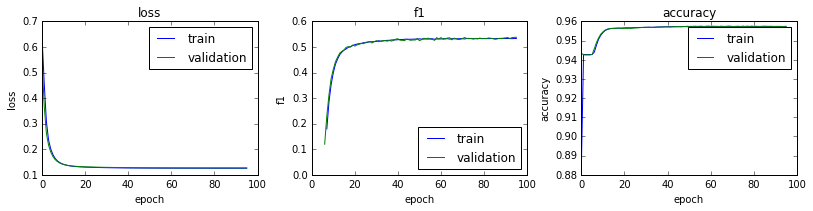

In [378]:
plot_history(trials, TID)

## Model fitting

In [338]:
param["data"]["truncate"] = False  #  this version was ran ignoring the truncate value
train, test = data.data(**param["data"])

In [339]:
m = model.model(**{"train_data": train, **param["model"]})

cur_model = param2str(param)
tb = kc.TensorBoard(log_dir='./logs4/'+ cur_model,
                    histogram_freq=0, 
                    write_graph=False, 
                    write_images=True)
cur_model

'pos_cls_w=None;filt=1;hid_nl=None;type=concat;hid_d=None;hid_n=None;n_bases=30;nl=relu;trunc=True;use_pssm=True;lr=0.00058;1337'

In [341]:
sample_weight = np.squeeze(np.where(train_train[1]==1, param["data"]["pos_class_weight"], 1), -1)
m.fit(train_train[0], train_train[1], epochs=50, 
      batch_size=128,
      sample_weight = sample_weight,
      validation_data=valid,
      callbacks=[kc.EarlyStopping(patience=2), tb])

Train on 22433 samples, validate on 5609 samples
Epoch 1/50
22433/22433 [==============================] - 3s - loss: 0.6625 - accuracy: 0.9329 - f1: nan - precision: nan - sensitivity_1: 0.0031 - sensitivity_2: 0.0031 - specificity: 0.9894 - fdr: nan - val_loss: 0.5070 - val_accuracy: 0.9425 - val_f1: nan - val_precision: nan - val_sensitivity_1: 0.0000e+00 - val_sensitivity_2: 0.0000e+00 - val_specificity: 1.0000 - val_fdr: nan
Epoch 2/50
22433/22433 [==============================] - 2s - loss: 0.5078 - accuracy: 0.9427 - f1: nan - precision: nan - sensitivity_1: 0.0000e+00 - sensitivity_2: 0.0000e+00 - specificity: 1.0000 - fdr: nan - val_loss: 0.3444 - val_accuracy: 0.9425 - val_f1: nan - val_precision: nan - val_sensitivity_1: 0.0000e+00 - val_sensitivity_2: 0.0000e+00 - val_specificity: 1.0000 - val_fdr: nan
Epoch 3/50
22433/22433 [==============================] - 2s - loss: 0.4159 - accuracy: 0.9427 - f1: nan - precision: nan - sensitivity_1: 0.0000e+00 - sensitivity_2: 0.0000

### Evaluate performance

In [340]:
from concise.utils.model_data import split_train_test_idx, subset

train_idx, valid_idx = split_train_test_idx(train, valid_split=.2, stratified=False, random_state=100)

valid = subset(train, valid_idx, keep_other=False)
train_train = subset(train, train_idx)

In [379]:
metrics_dt(m, {"train": train_train, "valid": valid, "test": test})

,dataset,loss,accuracy,f1,precision,sensitivity,sensitivity,specificity,fdr,auc,auprc
0,train,0.1352,0.9523,0.5693,0.5939,0.5527,0.5527,0.9769,0.4061,0.9185,0.5913
1,valid,0.1367,0.9519,0.5645,0.5911,0.5461,0.5461,0.9769,0.4089,0.9141,0.5879
2,test,0.1333,0.9524,0.5595,0.5667,0.5608,0.5608,0.9752,0.4333,0.9213,0.5755


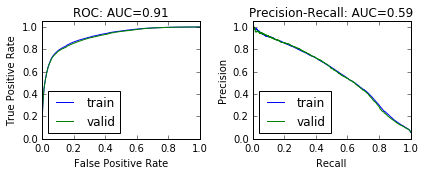

In [380]:
plot_roc_pr(m, [train_train, valid], ["train", "valid"])

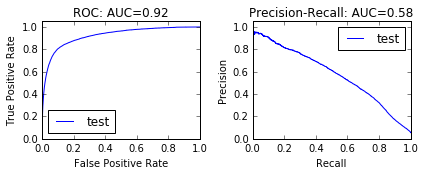

In [381]:
data = plot_roc_pr(m, [test], ["test"], return_data=True)
y_true, y_pred = data[0]

## Export predictions to csv

In [39]:
dt_pred = pd.DataFrame({"y_true": y_true.reshape((-1,)), "y_pred": y_pred.reshape((-1,))})
dt_pred = dt_pred[dt_pred["y_true"] != -1]
dt_pred["y_true"] = np.where(dt_pred["y_true"]== 1, "HC", "NEG")
dt_pred.sort_values("y_pred")

,y_pred,y_true
88891,0.0000,NEG
88884,0.0000,NEG
88885,0.0000,NEG
...,...,...
162182,0.9665,HC
197260,0.9754,HC
108969,0.9860,HC


In [40]:
dt_pred.to_csv("/s/project/deepcis/Concise/Splice_branchpoints/test_predictions/concise_shallow2.csv")

## Model interpretation

- **DONE** - download pwm from 
http://katahdin.mssm.edu/splice/splice_matrix.cgi?database=spliceNew

- **TODO** - read - http://www.nature.com.emedien.ub.uni-muenchen.de/nrg/journal/v17/n1/full/nrg.2015.3.html
- splice-site fractions: http://katahdin.mssm.edu/splice/splicesites.html
   - **U12 = 1%, U2 = 99%**

- **DONE** - initialize once only with U2 and then with U12 branchsite
0, 1 or 2 branchsite inizialized (use int as the variable) 

In [120]:
bp_freq = np.array([169, 1602, 469, 183800])

In [121]:
bp_freq

array([   169,   1602,    469, 183800])

In [122]:
bp_freq / bp_freq.sum()

array([ 0.0009,  0.0086,  0.0025,  0.988 ])

In [ ]:
sum(bp_freq[[0,2]]) / bp_freq.sum()

In [ ]:
sum([169, 1602, 469, 183800])

### PWM

filter index: 0


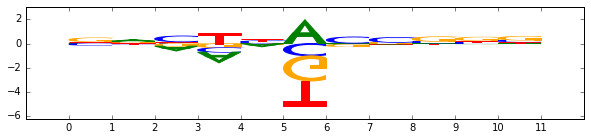

In [359]:
i = 19 if param["model"]["pos_effect"]["merge"]["type"]== "multiply" else 10
m.layers[i].plotFilters()

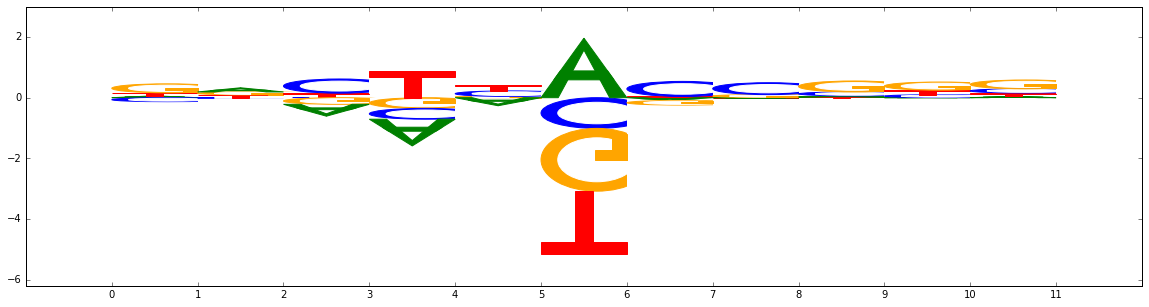

In [367]:
m.layers[i].plotFilter(0, (20, 5))

In [355]:
m.layers[19]

In [ ]:
m.layers[-1].get_weights()

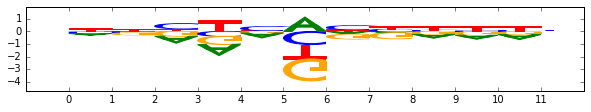

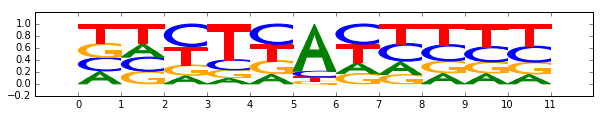

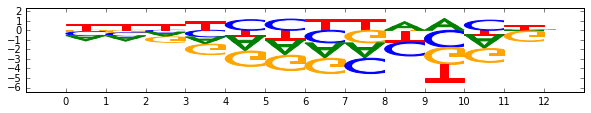

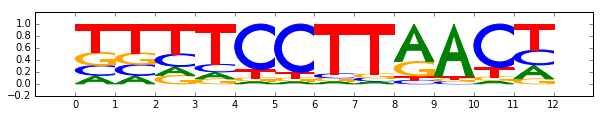

In [387]:
## Train motifs
pwm_list = train[4]
figsize = (10, 1.5)
pwm_list[0].plotPSSM(figsize=figsize)
pwm_list[0].plotPWM(figsize=figsize)
pwm_list[1].plotPSSM(figsize=figsize)
pwm_list[1].plotPWM(figsize=figsize)

The two pssm matrices differ slightly but have the same two strong bases 0:A and -2:T.

### Positional effects

In [62]:
param

{'data': {'n_bases': 20,
  'pos_class_weight': 9.171006099308933,
  'truncate': False},
 'fit': {'batch_size': 128,
  'early_stop_monitor': 'val_loss',
  'epochs': 150,
  'patience': 2},
 'model': {'filters': 1,
  'init_motifs': {'stddev': 0.1, 'use_pssm': True},
  'lr': 0.0034329655705705913,
  'nonlinearity': 'relu',
  'pos_effect': {'l2': 1.071557178101583e-08,
   'l2_smooth': 1.3725606005881432e-07,
   'merge': {'hidden_fc': None, 'type': 'concatenate'},
   'merge_type': 'multiply',
   'n_bases': 20,
   'use_bias': False},
  'use_weightnorm': False}}

In [345]:
position_stats = train[5]
position_stats

{'canon_hit1': {'max': 75.0, 'min': 1.0},
 'canon_hit2': {'max': 150.0, 'min': 3.0},
 'canon_hit3': {'max': 150.0, 'min': 5.0},
 'canon_hit4': {'max': 150.0, 'min': 7.0},
 'canon_hit5': {'max': 150.0, 'min': 10.0},
 'dist1': {'max': 10000.0, 'min': -20.0},
 'dist2': {'max': 44.0, 'min': 18.0},
 'ppt_run_length': {'max': 43.0, 'min': 0.0},
 'ppt_start': {'max': 36.0, 'min': 0.0}}

In [220]:
train[3]

['dist1',
 'dist2',
 'ppt_start',
 'ppt_run_length',
 'canon_hit1',
 'canon_hit2',
 'canon_hit3',
 'canon_hit4',
 'canon_hit5']

In [346]:
w_final = m.layers[-1].get_weights()[0][0,:]
w_final

array([[ 1.1306],
       [-1.042 ],
       [ 1.3441],
       [-1.0234],
       [ 0.954 ],
       [ 1.3813],
       [ 0.9028],
       [-0.789 ],
       [ 0.797 ],
       [ 0.925 ]], dtype=float32)

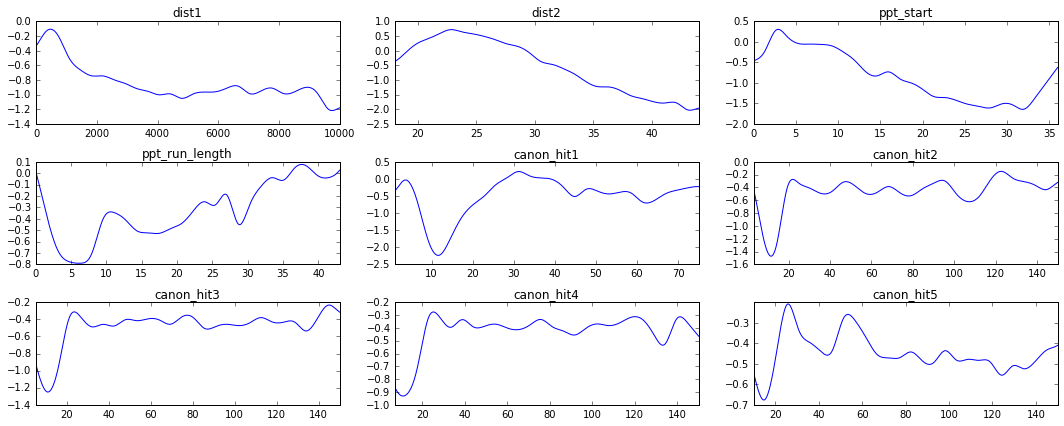

In [388]:
dfpos = plot_pos_dep(m, param, train)

In [384]:
dfpos.head()

,feature,x,y
0,dist1,-20.0000,-0.3459
1,dist1,-9.9700,-0.3404
2,dist1,0.0601,-0.3347
3,dist1,10.0901,-0.3288
4,dist1,20.1201,-0.3228


In [354]:
dfpos.to_csv("/s/project/deepcis/Concise/Splice_branchpoints/interpret/position/concise_shallow.csv")